In [6]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [7]:
SNR_array = []
random_scale = 2900

In [8]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [9]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

23 29
wvfrm = 
l =  0  SNR =  12.729658361158403  m1 =  23  m2 =  29
16 26
wvfrm = 
l =  0  SNR =  8.67654490728628  m1 =  16  m2 =  26
23 24
wvfrm = 
l =  1  SNR =  9.013590341619775  m1 =  23  m2 =  24
14 17
wvfrm = 
l =  2  SNR =  5.5840480447442085  m1 =  14  m2 =  17
15 24
wvfrm = 
l =  3  SNR =  9.668003224729251  m1 =  15  m2 =  24
15 12
wvfrm = 
l =  4  SNR =  7.677504201364691  m1 =  15  m2 =  12
13 19
wvfrm = 
l =  5  SNR =  7.764492511023902  m1 =  13  m2 =  19
12 28
wvfrm = 
l =  6  SNR =  8.030797272090961  m1 =  12  m2 =  28
27 27
wvfrm = 
l =  7  SNR =  11.904302690343119  m1 =  27  m2 =  27
27 21
wvfrm = 
l =  7  SNR =  9.985106878787212  m1 =  27  m2 =  21
24 27
wvfrm = 
l =  8  SNR =  12.227541899218224  m1 =  24  m2 =  27
28 13
wvfrm = 
l =  8  SNR =  7.937673480999606  m1 =  28  m2 =  13
28 10
wvfrm = 
l =  9  SNR =  8.722398049386324  m1 =  28  m2 =  10
15 30
wvfrm = 
l =  10  SNR =  8.811991148551009  m1 =  15  m2 =  30
14 24
wvfrm = 
l =  11  SNR =  9.42722492681

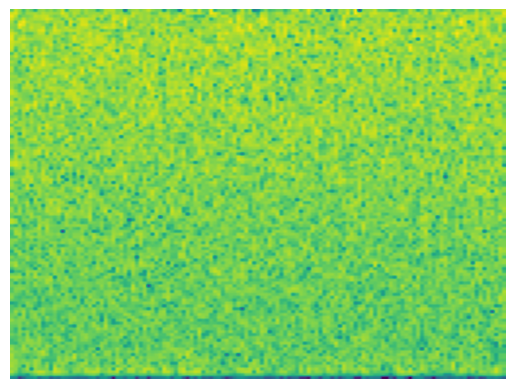

In [10]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    # random_scale900
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 20
wvfrm = 
l =  100  SNR =  9.036732653442735  m1 =  17  m2 =  20
11 25
wvfrm = 
l =  101  SNR =  8.099059648025262  m1 =  11  m2 =  25
18 26
wvfrm = 
l =  102  SNR =  9.022623958702605  m1 =  18  m2 =  26
29 20
wvfrm = 
l =  103  SNR =  9.865334465139235  m1 =  29  m2 =  20
27 28
wvfrm = 
l =  104  SNR =  12.425180248132314  m1 =  27  m2 =  28
27 21
wvfrm = 
l =  104  SNR =  9.158464483484462  m1 =  27  m2 =  21
23 20
wvfrm = 
l =  105  SNR =  9.05595636311707  m1 =  23  m2 =  20
30 26
wvfrm = 
l =  106  SNR =  10.410959638459587  m1 =  30  m2 =  26
14 14
wvfrm = 
l =  107  SNR =  6.280552873442583  m1 =  14  m2 =  14
26 27
wvfrm = 
l =  108  SNR =  11.142195409540323  m1 =  26  m2 =  27
13 11
wvfrm = 
l =  108  SNR =  6.589659428274218  m1 =  13  m2 =  11
24 10
wvfrm = 
l =  109  SNR =  7.310240741828889  m1 =  24  m2 =  10
25 13
wvfrm = 
l =  110  SNR =  6.425825578662957  m1 =  25  m2 =  13
25 12
wvfrm = 
l =  111  SNR =  7.499178913647501  m1 =  25  m2 =  12
16 21
wvfrm = 
l =

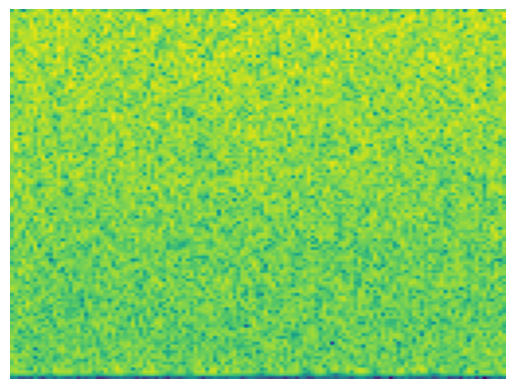

In [11]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 23
wvfrm = 
l =  200  SNR =  10.870505855513379  m1 =  21  m2 =  23
29 25
wvfrm = 
l =  201  SNR =  10.820260383866835  m1 =  29  m2 =  25
28 30
wvfrm = 
l =  202  SNR =  12.563929825220699  m1 =  28  m2 =  30
28 20
wvfrm = 
l =  202  SNR =  10.567394861150737  m1 =  28  m2 =  20
29 25
wvfrm = 
l =  203  SNR =  9.93163327198294  m1 =  29  m2 =  25
18 24
wvfrm = 
l =  204  SNR =  10.283931492076674  m1 =  18  m2 =  24
27 18
wvfrm = 
l =  205  SNR =  8.970112390958528  m1 =  27  m2 =  18
14 24
wvfrm = 
l =  206  SNR =  9.566938847232713  m1 =  14  m2 =  24
13 20
wvfrm = 
l =  207  SNR =  8.536311590967927  m1 =  13  m2 =  20
26 23
wvfrm = 
l =  208  SNR =  10.743809885177216  m1 =  26  m2 =  23
14 10
wvfrm = 
l =  209  SNR =  5.3770899642537495  m1 =  14  m2 =  10
21 19
wvfrm = 
l =  210  SNR =  7.865196867573142  m1 =  21  m2 =  19
16 28
wvfrm = 
l =  211  SNR =  10.070908805346916  m1 =  16  m2 =  28
19 22
wvfrm = 
l =  212  SNR =  8.785080746190287  m1 =  19  m2 =  22
22 19
wvfrm =

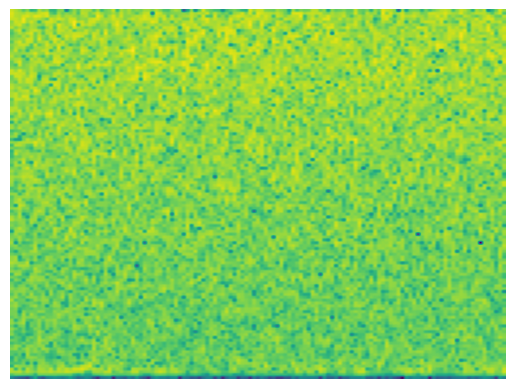

In [12]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 25
wvfrm = 
l =  300  SNR =  11.904962674101123  m1 =  25  m2 =  25
21 25
wvfrm = 
l =  300  SNR =  9.940245034891912  m1 =  21  m2 =  25
18 29
wvfrm = 
l =  301  SNR =  9.334339439739015  m1 =  18  m2 =  29
13 30
wvfrm = 
l =  302  SNR =  8.720552891267738  m1 =  13  m2 =  30
11 18
wvfrm = 
l =  303  SNR =  7.068362833949171  m1 =  11  m2 =  18
25 28
wvfrm = 
l =  304  SNR =  10.66504720061057  m1 =  25  m2 =  28
29 19
wvfrm = 
l =  305  SNR =  8.182181227942086  m1 =  29  m2 =  19
21 12
wvfrm = 
l =  306  SNR =  6.394443954615614  m1 =  21  m2 =  12
14 10
wvfrm = 
l =  307  SNR =  7.267566813149458  m1 =  14  m2 =  10
16 18
wvfrm = 
l =  308  SNR =  8.267538992789873  m1 =  16  m2 =  18
17 14
wvfrm = 
l =  309  SNR =  6.42154114579242  m1 =  17  m2 =  14
28 16
wvfrm = 
l =  310  SNR =  7.8876274886803825  m1 =  28  m2 =  16
15 27
wvfrm = 
l =  311  SNR =  9.073832152236518  m1 =  15  m2 =  27
10 10
wvfrm = 
l =  312  SNR =  5.120101236026642  m1 =  10  m2 =  10
17 12
wvfrm = 
l = 

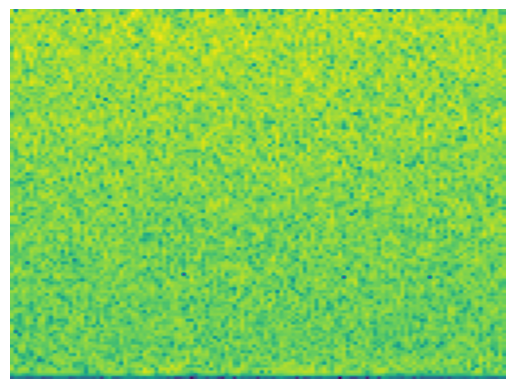

In [13]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 17
wvfrm = 
l =  400  SNR =  9.244429529159037  m1 =  21  m2 =  17
30 28
wvfrm = 
l =  401  SNR =  10.930938724885463  m1 =  30  m2 =  28
26 25
wvfrm = 
l =  402  SNR =  11.253077084121612  m1 =  26  m2 =  25
15 28
wvfrm = 
l =  402  SNR =  8.639475948341845  m1 =  15  m2 =  28
16 19
wvfrm = 
l =  403  SNR =  7.933697634254182  m1 =  16  m2 =  19
17 18
wvfrm = 
l =  404  SNR =  10.105847976106071  m1 =  17  m2 =  18
26 24
wvfrm = 
l =  405  SNR =  9.47333037382545  m1 =  26  m2 =  24
11 26
wvfrm = 
l =  406  SNR =  6.309254547536093  m1 =  11  m2 =  26
17 10
wvfrm = 
l =  407  SNR =  5.148675676717754  m1 =  17  m2 =  10
27 18
wvfrm = 
l =  408  SNR =  9.71933016467165  m1 =  27  m2 =  18
11 25
wvfrm = 
l =  409  SNR =  7.861972327901505  m1 =  11  m2 =  25
29 25
wvfrm = 
l =  410  SNR =  9.886553267602503  m1 =  29  m2 =  25
27 17
wvfrm = 
l =  411  SNR =  6.906335871319396  m1 =  27  m2 =  17
10 30
wvfrm = 
l =  412  SNR =  8.167247863676403  m1 =  10  m2 =  30
28 12
wvfrm = 
l = 

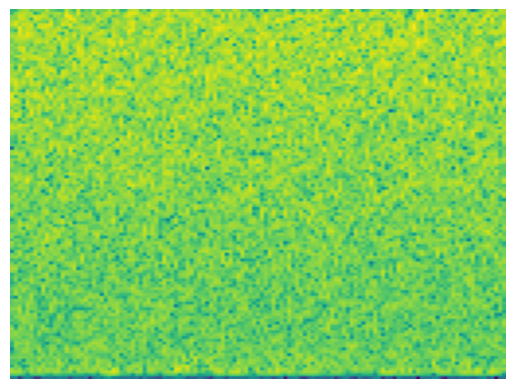

In [14]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [15]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 23
wvfrm = 
l =  500  SNR =  7.859510452494394  m1 =  16  m2 =  23
25 11
wvfrm = 
l =  501  SNR =  9.78091161326594  m1 =  25  m2 =  11
29 26
wvfrm = 
l =  502  SNR =  11.426717818175028  m1 =  29  m2 =  26
17 23
wvfrm = 
l =  502  SNR =  10.635465793627775  m1 =  17  m2 =  23
20 20
wvfrm = 
l =  503  SNR =  9.376406278441914  m1 =  20  m2 =  20
26 12
wvfrm = 
l =  504  SNR =  8.082415321931684  m1 =  26  m2 =  12
19 14
wvfrm = 
l =  505  SNR =  6.908110470885879  m1 =  19  m2 =  14
15 19
wvfrm = 
l =  506  SNR =  8.979644203552475  m1 =  15  m2 =  19
11 23
wvfrm = 
l =  507  SNR =  7.60070860795973  m1 =  11  m2 =  23
11 27
wvfrm = 
l =  508  SNR =  7.760229891646964  m1 =  11  m2 =  27
27 23
wvfrm = 
l =  509  SNR =  11.191417984243344  m1 =  27  m2 =  23
30 17
wvfrm = 
l =  509  SNR =  9.960627291481163  m1 =  30  m2 =  17
12 27
wvfrm = 
l =  510  SNR =  8.281277939304704  m1 =  12  m2 =  27
12 29
wvfrm = 
l =  511  SNR =  8.277354376182133  m1 =  12  m2 =  29
14 18
wvfrm = 
l = 

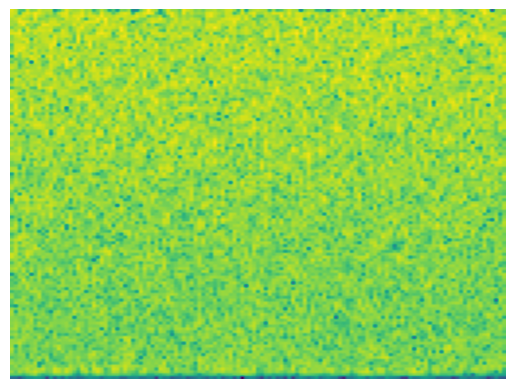

In [16]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 28
wvfrm = 
l =  600  SNR =  7.965577086179794  m1 =  14  m2 =  28
11 22
wvfrm = 
l =  601  SNR =  8.159486562174742  m1 =  11  m2 =  22
13 24
wvfrm = 
l =  602  SNR =  8.302685190686104  m1 =  13  m2 =  24
24 21
wvfrm = 
l =  603  SNR =  10.082206790504964  m1 =  24  m2 =  21
14 30
wvfrm = 
l =  604  SNR =  7.629207442555627  m1 =  14  m2 =  30
21 30
wvfrm = 
l =  605  SNR =  10.301098565240286  m1 =  21  m2 =  30
26 23
wvfrm = 
l =  606  SNR =  12.215353295736724  m1 =  26  m2 =  23
13 28
wvfrm = 
l =  606  SNR =  7.595331371094842  m1 =  13  m2 =  28
30 18
wvfrm = 
l =  607  SNR =  10.206936643181196  m1 =  30  m2 =  18
10 18
wvfrm = 
l =  608  SNR =  7.653310637630789  m1 =  10  m2 =  18
27 19
wvfrm = 
l =  609  SNR =  10.602816944180285  m1 =  27  m2 =  19
29 12
wvfrm = 
l =  610  SNR =  6.617196138618587  m1 =  29  m2 =  12
22 27
wvfrm = 
l =  611  SNR =  11.16732022028374  m1 =  22  m2 =  27
29 20
wvfrm = 
l =  611  SNR =  10.533264749046866  m1 =  29  m2 =  20
28 16
wvfrm = 

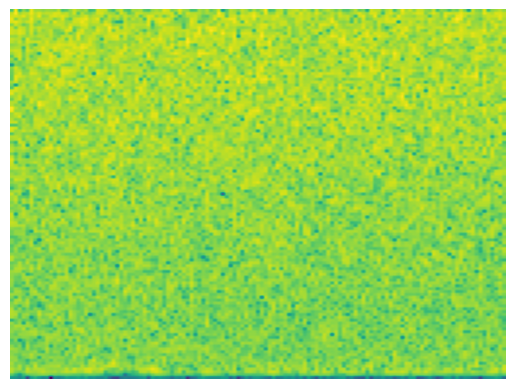

In [17]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 26
wvfrm = 
l =  700  SNR =  7.748415848573347  m1 =  17  m2 =  26
21 26
wvfrm = 
l =  701  SNR =  11.24170606871071  m1 =  21  m2 =  26
12 25
wvfrm = 
l =  701  SNR =  7.499700493693433  m1 =  12  m2 =  25
24 13
wvfrm = 
l =  702  SNR =  6.683508813019925  m1 =  24  m2 =  13
19 25
wvfrm = 
l =  703  SNR =  9.155010924808986  m1 =  19  m2 =  25
20 14
wvfrm = 
l =  704  SNR =  8.63502314118946  m1 =  20  m2 =  14
18 24
wvfrm = 
l =  705  SNR =  8.770285189542848  m1 =  18  m2 =  24
18 30
wvfrm = 
l =  706  SNR =  10.56118828472972  m1 =  18  m2 =  30
26 10
wvfrm = 
l =  707  SNR =  6.114927873241452  m1 =  26  m2 =  10
25 26
wvfrm = 
l =  708  SNR =  11.44235437589905  m1 =  25  m2 =  26
14 28
wvfrm = 
l =  708  SNR =  9.983835166611772  m1 =  14  m2 =  28
19 25
wvfrm = 
l =  709  SNR =  10.082877732201755  m1 =  19  m2 =  25
30 17
wvfrm = 
l =  710  SNR =  9.989452323068972  m1 =  30  m2 =  17
19 29
wvfrm = 
l =  711  SNR =  10.394540105169837  m1 =  19  m2 =  29
21 29
wvfrm = 
l = 

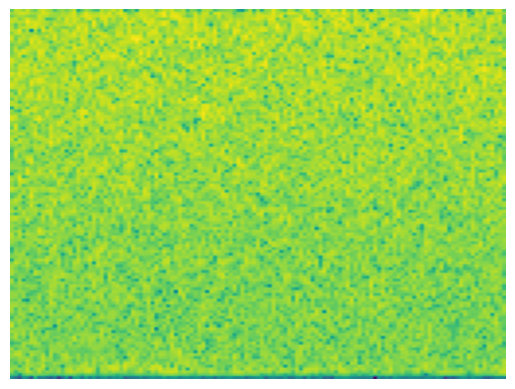

In [18]:
l = 700
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 25
wvfrm = 
l =  800  SNR =  9.108108714241714  m1 =  18  m2 =  25
17 26
wvfrm = 
l =  801  SNR =  11.057893911731965  m1 =  17  m2 =  26
10 25
wvfrm = 
l =  801  SNR =  7.491564202018931  m1 =  10  m2 =  25
18 12
wvfrm = 
l =  802  SNR =  7.621592678861715  m1 =  18  m2 =  12
26 10
wvfrm = 
l =  803  SNR =  7.895665462400986  m1 =  26  m2 =  10
21 17
wvfrm = 
l =  804  SNR =  10.242985095419876  m1 =  21  m2 =  17
12 27
wvfrm = 
l =  805  SNR =  6.493801272077623  m1 =  12  m2 =  27
22 14
wvfrm = 
l =  806  SNR =  8.602578210706076  m1 =  22  m2 =  14
12 12
wvfrm = 
l =  807  SNR =  6.704859211791282  m1 =  12  m2 =  12
17 13
wvfrm = 
l =  808  SNR =  7.551120058058786  m1 =  17  m2 =  13
22 24
wvfrm = 
l =  809  SNR =  11.961854894473218  m1 =  22  m2 =  24
24 24
wvfrm = 
l =  809  SNR =  9.250439605567598  m1 =  24  m2 =  24
30 20
wvfrm = 
l =  810  SNR =  11.18698292047743  m1 =  30  m2 =  20
30 17
wvfrm = 
l =  810  SNR =  10.3780354958438  m1 =  30  m2 =  17
13 25
wvfrm = 
l =

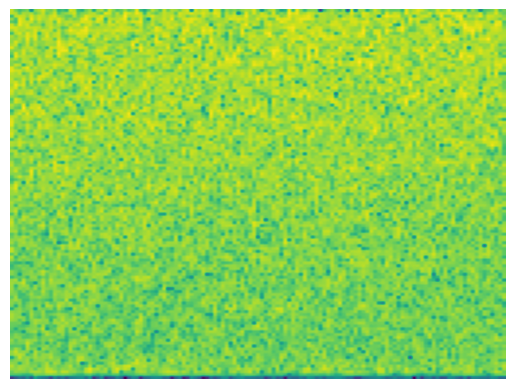

In [19]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 20
wvfrm = 
l =  900  SNR =  9.337151840498308  m1 =  26  m2 =  20
29 21
wvfrm = 
l =  901  SNR =  11.580597714509308  m1 =  29  m2 =  21
21 11
wvfrm = 
l =  901  SNR =  7.175476673096162  m1 =  21  m2 =  11
22 26
wvfrm = 
l =  902  SNR =  9.055743240543423  m1 =  22  m2 =  26
11 20
wvfrm = 
l =  903  SNR =  7.0965686817924  m1 =  11  m2 =  20
23 15
wvfrm = 
l =  904  SNR =  8.418128701494973  m1 =  23  m2 =  15
28 23
wvfrm = 
l =  905  SNR =  11.785673051009198  m1 =  28  m2 =  23
21 25
wvfrm = 
l =  905  SNR =  9.95972930440947  m1 =  21  m2 =  25
22 19
wvfrm = 
l =  906  SNR =  7.983235228703342  m1 =  22  m2 =  19
30 14
wvfrm = 
l =  907  SNR =  9.048830120523734  m1 =  30  m2 =  14
19 11
wvfrm = 
l =  908  SNR =  6.773232607920733  m1 =  19  m2 =  11
29 11
wvfrm = 
l =  909  SNR =  7.118959486708513  m1 =  29  m2 =  11
27 16
wvfrm = 
l =  910  SNR =  8.807182389548991  m1 =  27  m2 =  16
30 19
wvfrm = 
l =  911  SNR =  10.590318842519311  m1 =  30  m2 =  19
12 12
wvfrm = 
l =  

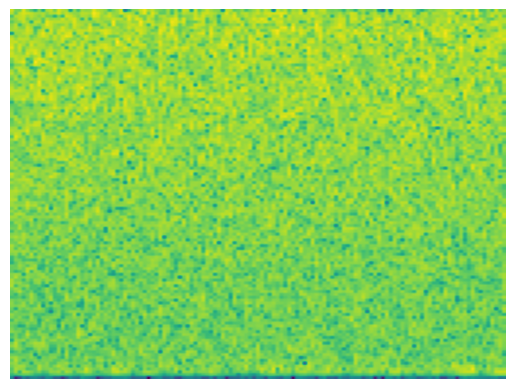

In [20]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 11
wvfrm = 
l =  1000  SNR =  7.150079998787264  m1 =  17  m2 =  11
17 22
wvfrm = 
l =  1001  SNR =  7.940580635227856  m1 =  17  m2 =  22
25 27
wvfrm = 
l =  1002  SNR =  11.585965767234327  m1 =  25  m2 =  27
12 15
wvfrm = 
l =  1002  SNR =  7.062999241778789  m1 =  12  m2 =  15
30 29
wvfrm = 
l =  1003  SNR =  12.103277745938025  m1 =  30  m2 =  29
16 28
wvfrm = 
l =  1003  SNR =  9.575578853536824  m1 =  16  m2 =  28
24 18
wvfrm = 
l =  1004  SNR =  7.34383460541619  m1 =  24  m2 =  18
13 13
wvfrm = 
l =  1005  SNR =  6.994062420056049  m1 =  13  m2 =  13
17 13
wvfrm = 
l =  1006  SNR =  8.337231054957503  m1 =  17  m2 =  13
13 16
wvfrm = 
l =  1007  SNR =  6.889674409577528  m1 =  13  m2 =  16
22 14
wvfrm = 
l =  1008  SNR =  6.758539713367543  m1 =  22  m2 =  14
11 25
wvfrm = 
l =  1009  SNR =  7.425589979431753  m1 =  11  m2 =  25
27 23
wvfrm = 
l =  1010  SNR =  11.162157103987917  m1 =  27  m2 =  23
10 29
wvfrm = 
l =  1010  SNR =  6.639236341602777  m1 =  10  m2 =  29
10 2

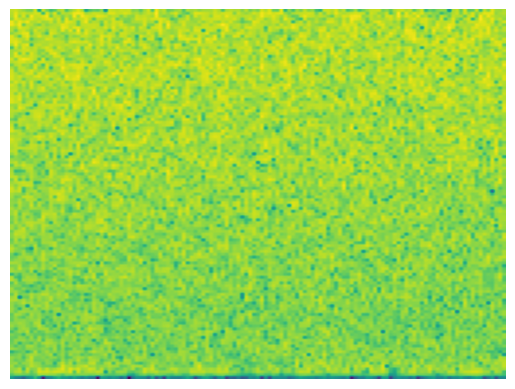

In [21]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 23
wvfrm = 
l =  1100  SNR =  7.9399630298818185  m1 =  16  m2 =  23
14 25
wvfrm = 
l =  1101  SNR =  7.0267969470003155  m1 =  14  m2 =  25
24 28
wvfrm = 
l =  1102  SNR =  10.485898334074161  m1 =  24  m2 =  28
11 11
wvfrm = 
l =  1103  SNR =  5.797968215380716  m1 =  11  m2 =  11
18 26
wvfrm = 
l =  1104  SNR =  10.05491111262516  m1 =  18  m2 =  26
27 16
wvfrm = 
l =  1105  SNR =  10.533280323838078  m1 =  27  m2 =  16
19 18
wvfrm = 
l =  1106  SNR =  6.386316656000933  m1 =  19  m2 =  18
10 15
wvfrm = 
l =  1107  SNR =  6.983806462733964  m1 =  10  m2 =  15
25 22
wvfrm = 
l =  1108  SNR =  10.327329345732707  m1 =  25  m2 =  22
19 21
wvfrm = 
l =  1109  SNR =  10.420911221096242  m1 =  19  m2 =  21
24 30
wvfrm = 
l =  1110  SNR =  9.059379847010469  m1 =  24  m2 =  30
22 24
wvfrm = 
l =  1111  SNR =  8.3396943520639  m1 =  22  m2 =  24
20 19
wvfrm = 
l =  1112  SNR =  9.26860125862157  m1 =  20  m2 =  19
11 26
wvfrm = 
l =  1113  SNR =  5.995216341720619  m1 =  11  m2 =  26
24 

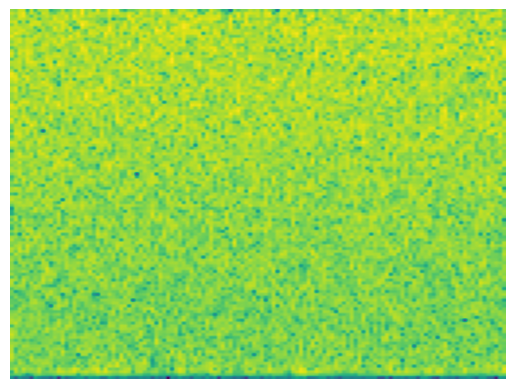

In [22]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 21
wvfrm = 
l =  1200  SNR =  9.248374047598203  m1 =  19  m2 =  21
11 15
wvfrm = 
l =  1201  SNR =  5.956315496070964  m1 =  11  m2 =  15
16 22
wvfrm = 
l =  1202  SNR =  8.072079480356797  m1 =  16  m2 =  22
10 14
wvfrm = 
l =  1203  SNR =  5.773746182709332  m1 =  10  m2 =  14
20 27
wvfrm = 
l =  1204  SNR =  10.174565602601561  m1 =  20  m2 =  27
16 27
wvfrm = 
l =  1205  SNR =  9.171726313689616  m1 =  16  m2 =  27
28 15
wvfrm = 
l =  1206  SNR =  8.932499030656421  m1 =  28  m2 =  15
21 20
wvfrm = 
l =  1207  SNR =  9.359387433568983  m1 =  21  m2 =  20
25 13
wvfrm = 
l =  1208  SNR =  8.370759467656212  m1 =  25  m2 =  13
30 23
wvfrm = 
l =  1209  SNR =  12.397556674267774  m1 =  30  m2 =  23
17 14
wvfrm = 
l =  1209  SNR =  7.89932828589588  m1 =  17  m2 =  14
27 23
wvfrm = 
l =  1210  SNR =  10.176434122835554  m1 =  27  m2 =  23
20 22
wvfrm = 
l =  1211  SNR =  10.33909016957737  m1 =  20  m2 =  22
19 14
wvfrm = 
l =  1212  SNR =  7.846552035600533  m1 =  19  m2 =  14
22 2

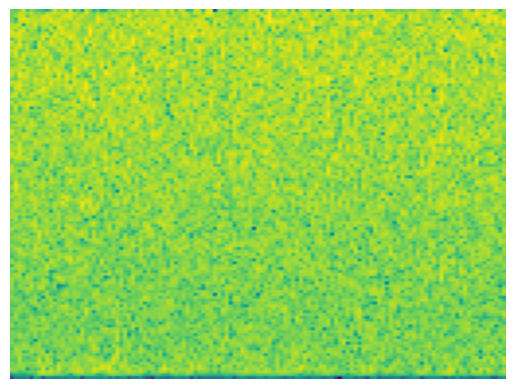

In [23]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 20
wvfrm = 
l =  1300  SNR =  10.330814446553198  m1 =  28  m2 =  20
26 27
wvfrm = 
l =  1301  SNR =  13.264745354221938  m1 =  26  m2 =  27
13 15
wvfrm = 
l =  1301  SNR =  7.905357377168335  m1 =  13  m2 =  15
18 14
wvfrm = 
l =  1302  SNR =  7.645179260036465  m1 =  18  m2 =  14
17 16
wvfrm = 
l =  1303  SNR =  9.089202686519547  m1 =  17  m2 =  16
10 11
wvfrm = 
l =  1304  SNR =  6.840092083787359  m1 =  10  m2 =  11
17 19
wvfrm = 
l =  1305  SNR =  9.74670797688611  m1 =  17  m2 =  19
10 21
wvfrm = 
l =  1306  SNR =  7.68322595277623  m1 =  10  m2 =  21
19 10
wvfrm = 
l =  1307  SNR =  7.9106446629070994  m1 =  19  m2 =  10
11 18
wvfrm = 
l =  1308  SNR =  6.519686111033168  m1 =  11  m2 =  18
13 14
wvfrm = 
l =  1309  SNR =  6.433031169823579  m1 =  13  m2 =  14
19 19
wvfrm = 
l =  1310  SNR =  8.367247227211637  m1 =  19  m2 =  19
14 16
wvfrm = 
l =  1311  SNR =  6.50530930188122  m1 =  14  m2 =  16
11 12
wvfrm = 
l =  1312  SNR =  3.721507216254478  m1 =  11  m2 =  12
20 16


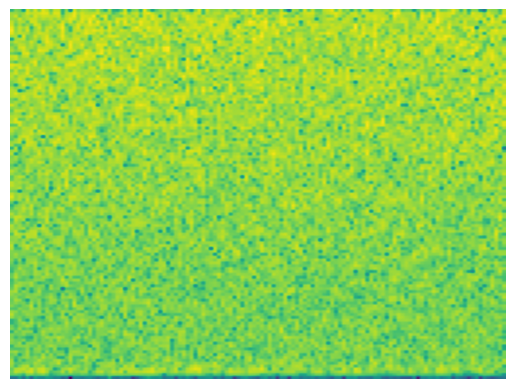

In [24]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 23
wvfrm = 
l =  1400  SNR =  9.642728897071182  m1 =  13  m2 =  23
20 10
wvfrm = 
l =  1401  SNR =  9.353295897403425  m1 =  20  m2 =  10
27 30
wvfrm = 
l =  1402  SNR =  12.795325315510816  m1 =  27  m2 =  30
24 19
wvfrm = 
l =  1402  SNR =  10.487175124318727  m1 =  24  m2 =  19
24 22
wvfrm = 
l =  1403  SNR =  10.767644812382786  m1 =  24  m2 =  22
22 12
wvfrm = 
l =  1404  SNR =  6.000226666038711  m1 =  22  m2 =  12
29 18
wvfrm = 
l =  1405  SNR =  10.488555659097564  m1 =  29  m2 =  18
12 14
wvfrm = 
l =  1406  SNR =  5.8492691016086376  m1 =  12  m2 =  14
19 27
wvfrm = 
l =  1407  SNR =  9.576042440415623  m1 =  19  m2 =  27
16 28
wvfrm = 
l =  1408  SNR =  7.5616398144244545  m1 =  16  m2 =  28
20 27
wvfrm = 
l =  1409  SNR =  11.833670068498684  m1 =  20  m2 =  27
29 13
wvfrm = 
l =  1409  SNR =  9.289037223727528  m1 =  29  m2 =  13
10 28
wvfrm = 
l =  1410  SNR =  7.194059405726184  m1 =  10  m2 =  28
26 19
wvfrm = 
l =  1411  SNR =  11.130996756068058  m1 =  26  m2 =  1

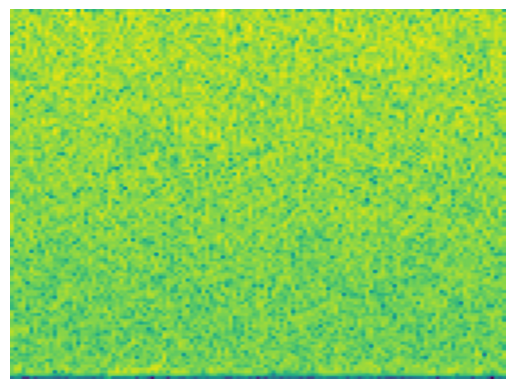

In [25]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # random_scalerandom.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
